# Fixed Income HW6
Cohort1 Group1 - Ahmed Khwaja, Mingyue Qiu, Noah Sutherland, Vrushali Behara

In [1]:
import pandas as pd
import numpy as np
import warnings,math
from sympy import symbols,solve,exp,nsolve
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
vol_data,dis_data,_=pd.read_excel('Homework_6_Data.xlsx',sheet_name=None).values()

Using the tree, solve for the price of a 5-year European call option on a 2-year bond with a coupon rate of 4% and where the strike price is 98.

In [2]:
bdt_df=pd.DataFrame(index=np.arange(0,7,0.5),columns=np.arange(0,7,0.5))
# start 0.5
dis=dis_data['D(T)'].iloc[0]
r=symbols('r')
equ=1/(1+r/2)*(1/2*1+1/2*1)-dis
r=solve(equ,r)[0]
bdt_df.iloc[0,0]=r

# Black-Derman-Toy Model
for i in range(1,len(bdt_df)):
    m=symbols('m')
    vol=vol_data['vol'].iloc[i-1]
    dis=dis_data['D(T)'].iloc[i]

    t=0.5
    equ_df=pd.DataFrame(index=[j for j in range(i+1)],columns=[j for j in range(i+1)])
    equ_df.iloc[0,i]=bdt_df.iloc[0,i-1]*exp(m*t+vol*np.sqrt(t))

    for j in range(1,i+1):
        equ_df.iloc[j,i]=equ_df.iloc[j-1,i]/exp(2*vol*np.sqrt(t))
    for j in range(i):
        equ_df.iloc[j,i-1]=(1/(equ_df.iloc[j,i]/2+1)*0.5+1/(equ_df.iloc[j+1,i]/2+1)*0.5)*1/(1+bdt_df.iloc[j,i-1]/2)

    for c in range(i-1):
        cc=i-2-c
        for j in range(cc+1):
            equ_df.iloc[j,cc]=(equ_df.iloc[j,cc+1]*0.5+equ_df.iloc[j+1,cc+1]*0.5)*1/(1+bdt_df.iloc[j,cc]/2)

    m=nsolve(equ_df.iloc[0,0]-dis,m,0)#[0].round(8)
    #print(i,m)
    for j in range(i+1):
        bdt_df.iloc[j,i]=equ_df.iloc[j,i].evalf(subs={'m':m}).round(8)

bdt_df

,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
0.0,0.0566049668038251,0.06327017,0.07257226,0.08412485,0.09832632,0.11415160,0.12911605,0.14604141,0.16249814,0.18081774,0.20008811,0.22062232,0.24211883,0.26440620
0.5,NaN,0.05492632,0.06124469,0.06950392,0.07953202,0.09103583,0.10267914,0.11581096,0.12922614,0.14420204,0.16024859,0.17744548,0.19556296,0.21447280
1.0,NaN,NaN,0.05168520,0.05742412,0.06433010,0.07260102,0.08165528,0.09183819,0.10276670,0.11500105,0.12834151,0.14271855,0.15795910,0.17396938
1.5,NaN,NaN,NaN,0.04744378,0.05203391,0.05789927,0.06493611,0.07282776,0.08172490,0.09171327,0.10278745,0.11478785,0.12758590,0.14111508
2.0,NaN,NaN,NaN,NaN,0.04208804,0.04617464,0.05164024,0.05775247,0.06499148,0.07314128,0.08232145,0.09232332,0.10305302,0.11446535
2.5,NaN,NaN,NaN,NaN,NaN,0.03682425,0.04106674,0.04579776,0.05168427,0.05833013,0.06593043,0.07425520,0.08323745,0.09284844
3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.03265820,0.03631766,0.04110176,0.04651824,0.05280303,0.05972310,0.06723212,0.07531391
3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02879993,0.03268605,0.03709827,0.04228943,0.04803501,0.05430438,0.06109080
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02599348,0.02958585,0.03386918,0.03863433,0.04386245,0.04955374
4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02359470,0.02712549,0.03107340,0.03542835,0.04019546


Graph the expected r value against the horizon. Recall that the expected value of r can be viewed as a futures rate (Eurodollar futures example). Contrast this with the forward rate for the same horizon computed using the initial term structure data.

In [3]:
prob_li=[]
for i in range(len(bdt_df)):
    a=[math.comb(i,j)*0.5**i for j in range(i+1)]
    prob_li.append(a)
prob_df=pd.DataFrame(prob_li).T
r_df=pd.DataFrame(bdt_df.values*prob_df.values)
exp_r=r_df.sum(axis=0)

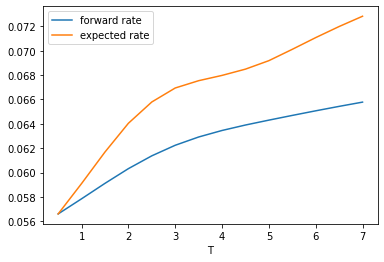

In [4]:
dis_data['r']=2*((1/dis_data['D(T)'])**(1/(2*dis_data['T']))-1)
plt.plot(dis_data['T'].iloc[:14],dis_data['r'].iloc[:14])
plt.plot(dis_data['T'].iloc[:14],exp_r)
plt.legend(['forward rate','expected rate'])
plt.xlabel('T')
plt.show()

In [5]:
# from year 5
bdt_df1=bdt_df.iloc[:,10:]
dt_from_y5=pd.DataFrame(columns=bdt_df1.columns.to_list(),index=bdt_df1.index.to_list())
dt_from_y5.iloc[:,0]=1/(bdt_df1.iloc[:,0]/2+1)
for i in range(1,dt_from_y5.shape[1]):
    l=bdt_df1.iloc[:,i].notna().sum()
    df=pd.DataFrame(index=[j for j in range(dt_from_y5.shape[0])],columns=[j for j in range(i)])
    for j in range(l-1):
        df.iloc[j,i-1]=1/(1+bdt_df1.iloc[j,i-1]/2)*(1/(bdt_df1.iloc[j,i]/2+1)*0.5+1/(bdt_df1.iloc[j+1,i]/2+1)*0.5)
    for c in range(i-1):
        cc=i-c-1
        ll=df.iloc[:,cc].notna().sum()
        for j in range(ll):
            df.iloc[j,cc]=(1/df.iloc[j,cc]-1)*2
        for j in range(ll-1):
            df.iloc[j,cc-1]=1/(1+bdt_df1.iloc[j,cc-1]/2)*(1/(df.iloc[j,cc]/2+1)*0.5+1/(df.iloc[j+1,cc]/2+1)*0.5)
    dt_from_y5.iloc[:,i]=df.iloc[:,0].to_list()

dt_from_y5=dt_from_y5.dropna(axis=0).reset_index(drop=True)
# D(0.5) D(1) D(1.5) D(2) at year 5
dt_from_y5

,5.0,5.5,6.0,6.5
0,0.90905450,0.826855942054108,0.752648253662019,0.685725125425694
1,0.92581938,0.857263006561950,0.793996536759583,0.735694801952211
2,0.93969882,0.882901091312963,0.829490837186641,0.779349218469435
3,0.95111848,0.904321809121973,0.859598651657886,0.816933737653184
4,0.9604665,0.922084680475399,0.884886732882694,0.848903103568713
5,0.9680868,0.936723608492727,0.905954984266929,0.875826220784216
6,0.9742776,0.948727217151948,0.923391275431265,0.898314614426610
7,0.9792931,0.958529528225412,0.937743653396324,0.916973311636659
8,0.9833474,0.966507551804611,0.949505528588700,0.932370123528634
9,0.9866187,0.972983248655575,0.959109969680663,0.945018907352391


In [6]:
pv_at5=2*dt_from_y5.iloc[:,:3].sum(axis=1)+100*dt_from_y5.iloc[:,3]
call_v_at5=pd.DataFrame(data={'call value at y5':[x-98 if x-98>0 else 0 for x in pv_at5],'prob':[
math.comb(10,i)*0.5**10 for i in range(11)]})
call_v_at5

,call value at y5,prob
0,0,0.000977
1,0,0.009766
2,0,0.043945
3,0,0.117188
4,0,0.205078
5,0,0.246094
6,0,0.205078
7,0,0.117188
8,1.03573334549814,0.043945
9,2.33931467150626,0.009766


In [7]:
call_v_at0=(call_v_at5['call value at y5']*call_v_at5['prob']).sum()*dis_data['D(T)'].iloc[9]
call_v_at0

0.0522405849205912